### Problem set-up

Let us teleport the quantum state 
$$\sqrt{0.35}\vert0\rangle + \sqrt{0.65}\vert1\rangle$$ from Alice's qubit to Bob's qubit. Recall that the teleportation algorithm consists of four major components:

1. Initializing the state to be teleported. We will do this on Alice's qubit `q0`.
2. Creating entanglement between two qubits. We will use qubits `q1` (Alice's) and `q2` (Bob's) for this.
3. Applying a Bell measurement on Alice's qubits `q0` and `q1`.
4. Applying classically controlled operations on Bob's qubit `q2` depending on the outcomes of the Bell measurement on Alice's qubits.

### Initializing the state to be teleported

In [127]:
def initialize_qubit(given_circuit, qubit_index):
    
    import numpy as np    
    given_circuit.initialize([np.sqrt(0.70), np.sqrt(0.30)], qubit_index)
    
    return given_circuit

Next, we need to create entanglement between Alice's and Bob's qubits.

In [128]:
def entangle_qubits(given_circuit, qubit_Alice, qubit_Bob):
    
    given_circuit.h(qubit_Alice)
    given_circuit.cx(qubit_Alice,qubit_Bob)
    
    return given_circuit

Next, we need to do a Bell measurement of Alice's qubits.

In [129]:
def bell_meas_Alice_qubits(given_circuit, qubit1_Alice, qubit2_Alice, clbit1_Alice, clbit2_Alice):

    given_circuit.cx(qubit1_Alice, qubit2_Alice)
    given_circuit.h(qubit1_Alice)
    given_circuit.barrier()
    given_circuit.measure(qubit1_Alice, clbit1_Alice)
    given_circuit.measure(qubit2_Alice, clbit2_Alice)

    return given_circuit

### Bob's job

Finally, we apply controlled operations on Bob's qubit. Recall that the controlled operations are applied in this order:

- an $X$ gate is applied on Bob's qubit if the measurement coutcome of Alice's second qubit, `clbit2_Alice`, is `1`.
- a $Z$ gate is applied on Bob's qubit if the measurement coutcome of Alice's first qubit, `clbit1_Alice`, is `1`.

In [130]:
def controlled_ops_Bob_qubit(given_circuit, qubit_Bob, clbit1_Alice, clbit2_Alice):

    given_circuit.x(qubit_Bob).c_if(clbit2_Alice, 1)
    given_circuit.z(qubit_Bob).c_if(clbit1_Alice, 1)    

    return given_circuit

The next lines of code put everything together.

### Pipelining

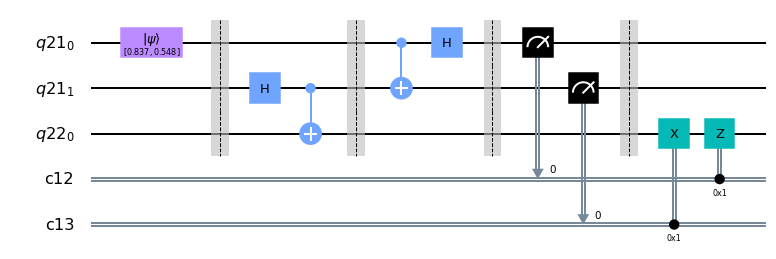

In [134]:
### imports
from qiskit import QuantumRegister, ClassicalRegister

### set up the qubits and classical bits
all_qubits_Alice = QuantumRegister(2)
all_qubits_Bob = QuantumRegister(1)
creg1_Alice = ClassicalRegister(1)
creg2_Alice = ClassicalRegister(1)

### quantum teleportation circuit here
# Initialize
mycircuit = QuantumCircuit(all_qubits_Alice, all_qubits_Bob, creg1_Alice, creg2_Alice)
initialize_qubit(mycircuit, 0)
mycircuit.barrier()
# Entangle
entangle_qubits(mycircuit, 1, 2)
mycircuit.barrier()
# Do a Bell measurement
bell_meas_Alice_qubits(mycircuit, all_qubits_Alice[0], all_qubits_Alice[1], creg1_Alice, creg2_Alice)
mycircuit.barrier()
# Apply classically controlled quantum gates
controlled_ops_Bob_qubit(mycircuit, all_qubits_Bob[0], creg1_Alice, creg2_Alice)

# Look at the complete circuit
mycircuit.draw('mpl')